#### Dataset Used: California Housing dataset in sklearn.datasets
#### Name: Rajath C Aralikatti
#### Roll No: 181CO241 Section 2

## Linear Regression

## Import the required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Load Dataset

In [2]:
dataset = datasets.fetch_california_housing()
dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

## Dataset Info

In [3]:
print(dataset['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [4]:
x = np.array(dataset['data'])
y = np.array(dataset['target'])
feat_names = dataset['feature_names']

print('Input features shape is', x.shape, 'and type is', x.dtype)
print('Output shape is', y.shape, 'and type is', y.dtype)

print('\nList of Features is:')
for i in feat_names:
  print(i, end=' ')

Input features shape is (20640, 8) and type is float64
Output shape is (20640,) and type is float64

List of Features is:
MedInc HouseAge AveRooms AveBedrms Population AveOccup Latitude Longitude 

## Splitting data between Train and Test sets

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [6]:
print('Dimensions and datatype of')

print('x_train:', x_train.shape, '\tdtype:', x_train.dtype, '\tRange:', x_train.min(), 'to', x_train.max())
print('y_train:', y_train.shape, '\tdtype:', y_train.dtype, '\tRange:', y_train.min(), 'to', y_train.max())

print('x_test:', x_test.shape, '\tdtype:', x_test.dtype, '\tRange:', x_test.min(), 'to', x_train.max())
print('y_test:', y_test.shape, '\tdtype:', y_test.dtype, '\tRange:', y_test.min(), 'to', y_test.max())

Dimensions and datatype of
x_train: (16512, 8) 	dtype: float64 	Range: -124.35 to 35682.0
y_train: (16512,) 	dtype: float64 	Range: 0.14999 to 5.00001
x_test: (4128, 8) 	dtype: float64 	Range: -124.3 to 35682.0
y_test: (4128,) 	dtype: float64 	Range: 0.14999 to 5.00001


## Normalize the data

In [7]:
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)

In [8]:
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

In [9]:
print('Dimensions and datatype of')

print('x_train:', x_train.shape, '\tdtype:', x_train.dtype, '\tRange:', x_train.min(), 'to', x_train.max())
print('y_train:', y_train.shape, '\tdtype:', y_train.dtype, '\tRange:', y_train.min(), 'to', y_train.max())

print('x_test:', x_test.shape, '\tdtype:', x_test.dtype, '\tRange:', x_test.min(), 'to', x_train.max())
print('y_test:', y_test.shape, '\tdtype:', y_test.dtype, '\tRange:', y_test.min(), 'to', y_test.max())

Dimensions and datatype of
x_train: (16512, 8) 	dtype: float64 	Range: -2.3873002025635786 to 92.63629617403092
y_train: (16512,) 	dtype: float64 	Range: 0.14999 to 5.00001
x_test: (4128, 8) 	dtype: float64 	Range: -2.362364916897036 to 92.63629617403092
y_test: (4128,) 	dtype: float64 	Range: 0.14999 to 5.00001


##  Loading and Fitting the Model

In [10]:
model = LinearRegression(fit_intercept=True, normalize=False, copy_X=True)
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Prediction on the Test Set

In [11]:
print('Model Coefficients are', model.coef_)
print('Model Intercept is', model.intercept_)

Model Coefficients are [ 0.82624793  0.1171006  -0.24891059  0.29038746 -0.00864349 -0.03056429
 -0.90042112 -0.87058566]
Model Intercept is 2.072498958938836


In [12]:
y_pred = model.predict(x_test)

## Analysis, MSE and RMSE

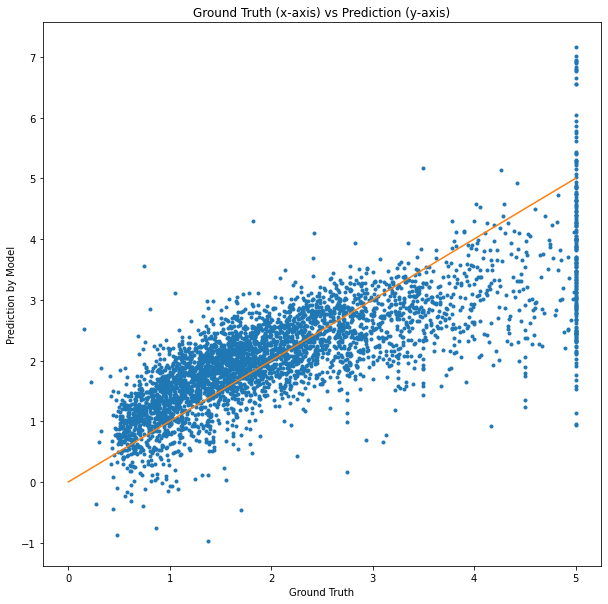

In [13]:
plt.figure(figsize=(10, 10)) 
plt.plot(y_test, y_pred, '.')
plt.xlabel('Ground Truth')
plt.ylabel('Prediction by Model')
plt.title('Ground Truth (x-axis) vs Prediction (y-axis)')

# Plotting line y=x. Perfect Predictions will fall on this line.
plt.plot([0, 5], [0, 5])

In [14]:
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('Ground Truth Range', np.min(y_test), 'to', np.max(y_test))
print('Prediction Range', np.min(y_pred), 'to', np.max(y_pred))
print()

print('The Mean Squared Error is', mse)
print('The Root Mean Squared Error is', rmse)

Ground Truth Range 0.14999 to 5.00001
Prediction Range -0.9735539990817283 to 7.163931134846754

The Mean Squared Error is 0.5289841670367208
The Root Mean Squared Error is 0.7273129773603114
